In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [48]:
def load_datasets(filename, column_list, target_column):
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [49]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [50]:
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [51]:
def normalize(X):
    mean = X.mean()
    std = X.std()
    X_new = (X-mean)/std
    return X_new, mean, std

In [52]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [53]:
def hypothesis(X, theta):
    return X.dot(theta)

In [54]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = ((hypothesis(X, theta) - y).T.dot(hypothesis(X, theta) - y)) / (2*m)
    return J

In [55]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_theta = (X.T.dot(hypothesis(X,theta) - y)) / m
    return d_theta

In [56]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    eps = 0.00000000000000001
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha * derivative(X, y, theta)
        J = cost_function(X, y, theta)
        err = np.abs(J-J_history[-1])
        if print_J == True:
            print(J)
        J_history.append(J)
        if (err < eps or num_iters > 100000000):
            break
    return theta, J_history

In [57]:
def plot_J(X, y):
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

# Main

In [58]:
X, y = load_datasets('burrito.csv', ["population"], "profit")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97,)


In [59]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


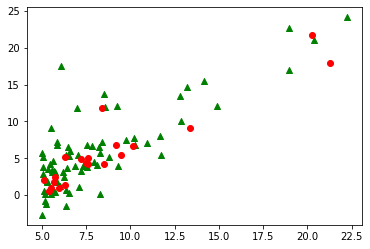

In [60]:
plot_data(X_train, X_test, y_train, y_test)

In [61]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

In [62]:
y = y_train[:]

In [63]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
#theta = np.array([0, 0])
#X = prepare_X(X)
#print(cost_function(X, y, theta)) #32.072 - ok

X: (77, 2)
y: (77,)


In [64]:
alpha = 0.01
num_iters = 1500

In [65]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1])) #Theta 0: 5.84; Theta 1: 4.59

Theta 0: 5.825737308533447; Theta 1: 4.4819177487884305


C:\Users\User\AppData\Local\Temp\ipykernel_4644\445133622.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


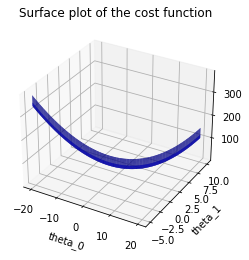

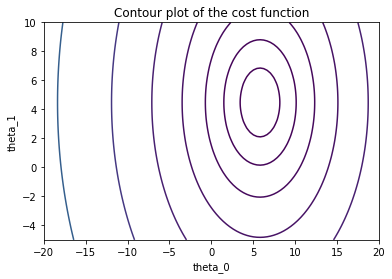

In [66]:
plot_J(X, y)

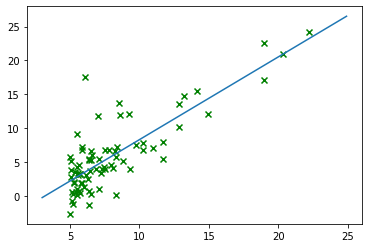

In [67]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

In [68]:
X_test_proc = (X_test-mean)/std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test.squeeze(), 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print("cost_function: ",cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred         err
0    5.7737   2.44060   3.122760   27.950489
1    5.5416   1.01790   2.838852  178.893061
2    7.6031   4.99810   5.360501    7.250777
3    7.4764   4.34830   5.205520   19.713918
4    5.1077   2.05760   2.308101   12.174446
5    7.2182   4.88520   4.889687    0.091856
6    9.4536   5.41410   7.624052   40.818460
7    9.1802   6.79810   7.289626    7.230351
8    8.5172   4.24150   6.478638   52.744026
9   13.3940   9.05510  12.443991   37.425221
10   8.3829  11.88600   6.314361   46.875646
11   6.3261   5.18750   3.798461   26.776652
12   5.4369   0.61705   2.710782  339.313235
13  10.1360   6.67990   8.458771   26.630206
14   6.0020   0.92695   3.402019  267.012095
15  20.2700  21.76700  20.854787    4.190806
16  21.2790  17.92900  22.089007   23.202670
17   5.7077   1.84510   3.042028   64.870616
18   6.3328   1.42330   3.806657  167.452869
19   7.6366   4.29590   5.401479   25.735670
cost_function:  2.4861192853049756


In [69]:
X = np.concatenate((X_train, X_test), axis=None)
X = (X-mean)/std
X = prepare_X(X)

y = np.concatenate((y_train, y_test), axis=None)

y_pred = hypothesis(X,new_theta)
print("R\u00b2 = ", r2_score(y,y_pred))

R² =  0.7002201170549123
